# TP 5

## Régression de faible rang sur des données simulées



*   Créer une matrice de rang faible $W$. Vous pouvez créer par exemple une matrice $W$ de taille $15 \times 15$ avec un rang égale à 2. Pour créer une matrice de rang faible, vous pouvez utiliser la formule $rang(AB) \leq \min(rang(A),rang(B))$. Afficher la matrice avec la commande `imshow`. 





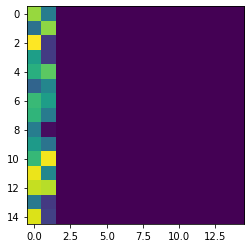

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def matrice_rang_faible(r):
  A = np.random.random((15,15))
  B = np.zeros(A.shape)
  rang = r
  for i in range(r):
    B[i, i] = 1
  W = A.dot(B)
  return W
  #print(W)

W=matrice_rang_faible(2)
plt.imshow(W)

*   Générer des données d'apprentissage $\{(x_i,y_i), i=1,\ldots,n\}$ suivant le modèle $y_i = Wx_i + \epsilon_i$.



In [2]:
d = W.shape[0]
n = 100
epsilon = np.random.normal(0,0.5,(n,d))
X = np.random.rand(n,d)
Y = X.dot(W) + epsilon
#print(Y)

* Implémenter la méthode de régression de faible rang. Le rang de la solution est un paramètre de la méthode.



In [3]:
def reg_faible_rang(r,X,Y):

  #Solution moindre carrée
  C = (X.T).dot(X)
  Cinv = np.linalg.pinv(C)
  Wls = Cinv.dot(X.T)
  Wls = Wls.dot(Y)

  #Estimateur moindre carré
  Yls = X.dot(Wls)

  #SVD de Y* et la matrice de projection
  U, S, V = np.linalg.svd(Yls, full_matrices = False)
  Pr = V[:r,:]
  Pr = np.dot(np.transpose(Pr),Pr)

  #Solution de la régression de rang faible
  Wr = np.dot(Wls,Pr)
  return Wr, Wls

#print(reg_faible_rang(2,X,Y))




* Evaluer les performances de prédiction de la régression de faible rang sur un jeu de données test. Comparer les résultats avec la régression par moindres carrés. 



In [4]:
ntest = 100
Xtest = np.random.rand(ntest,d)
(Wr,Wls) = reg_faible_rang(2,X,Y)

Ytr = np.dot(Xtest,Wr)
Ytls = np.dot(Xtest,Wls)
Ytest = np.dot(Xtest,W)

print('Performance_moindre_carre:',np.linalg.norm(Ytest-Ytls))
print('Performance_regression_faible:',np.linalg.norm(Ytest-Ytr))


Performance_moindre_carre: 7.624800507084764
Performance_regression_faible: 4.497454442942332


* Afficher les matrices de paramètres $W_r$ et $W_{LS}$ obtenues par les deux méthodes et comparer les résultats. Comparer les résultats en mesurant l'erreur entre la vraie matrice W utilisée pour générer les données et les matrices $W_r$ et $W_{LS}$ obtenues dans les deux stratégies d'estimation.



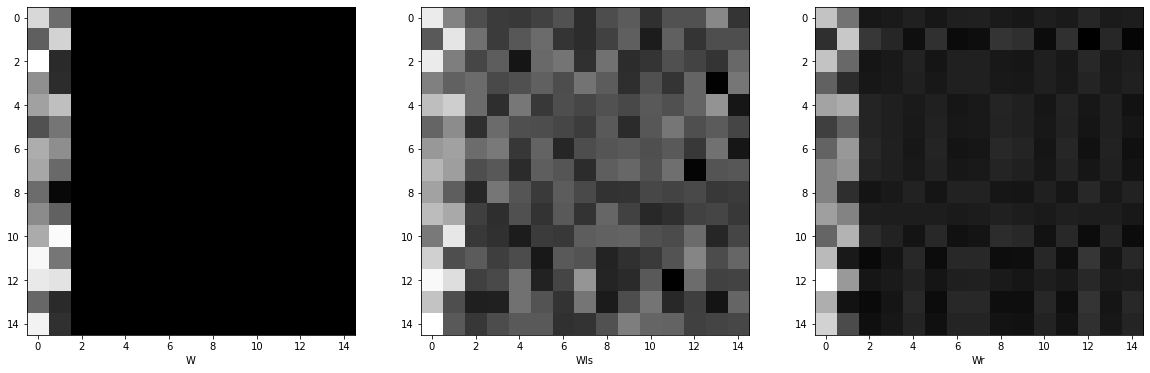

In [5]:
fig, axs = plt.subplots(ncols=3, nrows=1,figsize=(20, 20))

axs[0].imshow(W, cmap='gray')
axs[0].set(xlabel='W')

axs[1].imshow(Wls, cmap='gray')
axs[1].set(xlabel='Wls')

axs[2].imshow(Wr, cmap='gray')
axs[2].set(xlabel='Wr')

plt.show()

#On voit la représentation de Wr est plus proche de W que celle de Wls.

* Evaluer l'impact du choix du rang sur les résultats. Evaluer l'impact du choix du rang sur les résultats en faisant varier le rang de $W_r$ et en traçant l'erreur de test en fonction du rang de $W_r$ (le rang r de $W$ ne change pas).

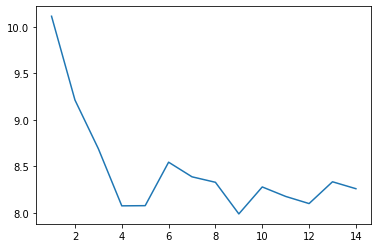

[10.116244315047533,
 9.214422740457945,
 8.689769140512647,
 8.075158840065841,
 8.077016375553967,
 8.545079639196494,
 8.387568692573629,
 8.328610776468436,
 7.988216372495823,
 8.278578776562252,
 8.176501051615565,
 8.099560920802848,
 8.334194513964425,
 8.259584374848277]

In [6]:
def impact_rang(r,n):
  #Création des données
  W=matrice_rang_faible(r)
  d = W.shape[0]
  epsilon = np.random.normal(0,0.5,(n,d))
  X = np.random.rand(n,d)
  Y = X.dot(W) + epsilon

  #Test avec différents rangs
  résultat=[]
  
  for i in range(1,d):
    (Wr,Wls) = reg_faible_rang(i,X,Y)
    Xtest = np.random.rand(n,d)
    Ytr = np.dot(Xtest,Wr)
    Ytest = np.dot(Xtest,W)
    résultat.append(np.linalg.norm(Ytest-Ytr))
  rang=np.arange(1,d)
  plt.plot(rang,résultat)
  plt.show()
  return résultat

impact_rang(10,100)

#Les résultats montrent que plus le rang de Wr est proche du rang de W, moins l'erreur de test est importante.


## Apprentissage multi-tâche et régularisation



*   Télécharger un jeu de données d'apprentissage multi-tâche (vous pouvez utiliser un jeu de données de régression multivariée). Vous pouvez utiliser le jeu de données School ou Sarcos qui sont disponibles à partir de ce lien : https://github.com/chcorbi/MultiTaskLearning. Pour plus de détails sur School dataset, voir https://ttic.uchicago.edu/~argyriou/code/mtl_feat/school_splits.tar. Pour plus de détails sur Sarcos dataset, voir http://www.gaussianprocess.org/gpml/data/.

*   La régression multitaskLasso est déjà implémenté dans le module `linear_model` de scikit-learn. Expliquer le fonctionnement de cette méthode.


*   Comparer les méthodes de régression ridge, régression Lasso, régression de rang faible et régression multitaskLasso.



In [7]:
from google.colab import files
uploaded = files.upload() #sarcos_inv.mat

Saving sarcos_inv.mat to sarcos_inv.mat


In [8]:
from google.colab import files
uploaded2 = files.upload() #sarcos_inv_test.mat

Saving sarcos_inv_test.mat to sarcos_inv_test.mat


In [ ]:
#La regression MultiLasso de faire plusieurs regressions en se basant sur un jeu de donnée différent par regression (regression multivariée).
#Le modèle de regression est un modèle linéaire semblable à la regression de Lasso. 
#Mais là où la regression de Lasso utilise la norme L1 pour son terme de regulation,
#le modoèle de regression utilise un mixte entre les normes L1 et L2 pour son terme de regularisation.

In [10]:
import scipy.io
from scipy.io import loadmat
import pandas as pd

columns_X = ['joint_position_1', 'joint_position_2', 'joint_position_3', 'joint_position_4', 'joint_position_5', 'joint_position_6' , 'joint_position_7',
           'joint_velocities_1', 'joint_velocities_2', 'joint_velocities_3', 'joint_velocities_4', 'joint_velocities_5', 'joint_velocities_6' , 'joint_velocities_7',
           'joint_accelerations_1', 'joint_accelerations_2', 'joint_accelerations_3', 'joint_accelerations_4', 'joint_accelerations_5', 'joint_accelerations_6' , 'joint_accelerations_7']

columns_Y = ['joint_torques_1', 'joint_torques_2', 'joint_torques_3', 'joint_torques_4', 'joint_torques_5', 'joint_torques_6' , 'joint_torques_7']

# Load training set
sarcos_train = loadmat("/content/sarcos_inv.mat")
#print(uploaded.keys())
# Inputs  (7 joint positions, 7 joint velocities, 7 joint accelerations)
Xtrain = pd.DataFrame(sarcos_train["sarcos_inv"][:, :21], columns=columns_X)
# Outputs (7 joint torques)
Ytrain = pd.DataFrame(sarcos_train["sarcos_inv"][:, 21:], columns=columns_Y)

#display(Ytrain)

# Load test set
sarcos_test = loadmat("/content/sarcos_inv_test.mat")
Xtest = pd.DataFrame(sarcos_test["sarcos_inv_test"][:, :21], columns=columns_X)
Ytest = pd.DataFrame(sarcos_test["sarcos_inv_test"][:, 21:], columns=columns_Y)



In [11]:
from sklearn.linear_model import Ridge, Lasso, MultiTaskLasso
from sklearn.metrics import mean_squared_error

ridge = Ridge()
lasso = Lasso()
MTL = MultiTaskLasso(alpha=0.5)

models = {'ridge' : ridge, 'lasso' : lasso, 'MTL' : MTL}
for k,model in models.items():
  model.fit(Xtrain, Ytrain)
  Y_model_test = model.predict(Xtest)
  print('Mean squared error',k,":",mean_squared_error(Ytest,Y_model_test))

#regression faible
for i in range(2,10):
  (Wr,Wls) = reg_faible_rang(i,Xtrain,Ytrain)
  Yr_test = np.dot(Xtest,Wr)
  print('mean squared error with rank',i,':',mean_squared_error(Ytest , Yr_test))

print(Ytest.shape[0])

Mean squared error ridge : 10.569271815412534
Mean squared error lasso : 21.138007361842586
Mean squared error MTL : 15.772965410596957
mean squared error with rank 2 : 20.890384691068373
mean squared error with rank 3 : 14.977000990344923
mean squared error with rank 4 : 11.927225633654603
mean squared error with rank 5 : 11.602424165286704
mean squared error with rank 6 : 11.558006876876549
mean squared error with rank 7 : 11.532110065666446
mean squared error with rank 8 : 11.532110065666446
mean squared error with rank 9 : 11.532110065666446
4449
